In [5]:
from tensorflow import keras
import cv2
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np
import matplotlib.pyplot as plt
folder = "/workspaces/TensorFlow-Pet-Classifier/data/train2/train"

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [2]:
from keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
train = trdata.flow_from_directory(directory="/workspaces/cesarseneca-deep-learning/data/train2",target_size=(200,200))
tsdata = ImageDataGenerator()
test = tsdata.flow_from_directory(directory="/workspaces/cesarseneca-deep-learning/data/test",target_size=(200,200))

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


Perros

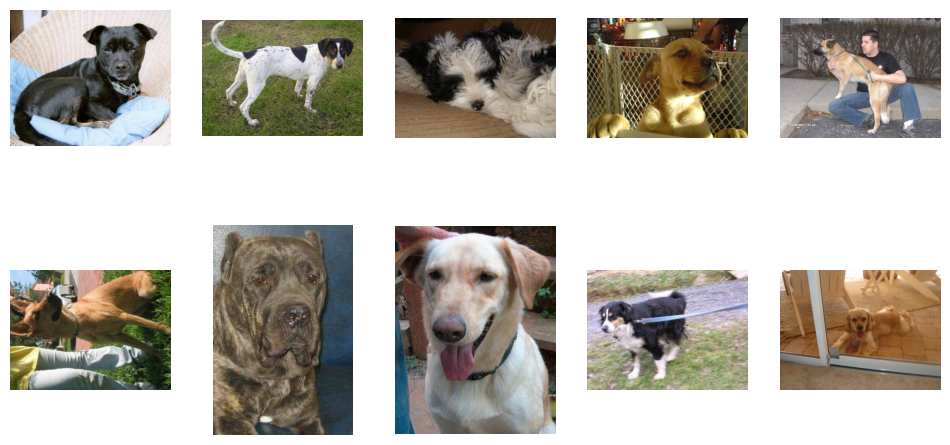

In [3]:
def load_dog_images(folder):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if filename.startswith("dog"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            images.append(img)
            count += 1
            if count == 10:
                break
    return images

dog_images = load_dog_images(folder)

plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(dog_images[i], cv2.COLOR_BGR2RGB))
    plt.axis("off")

plt.show()

Gatos

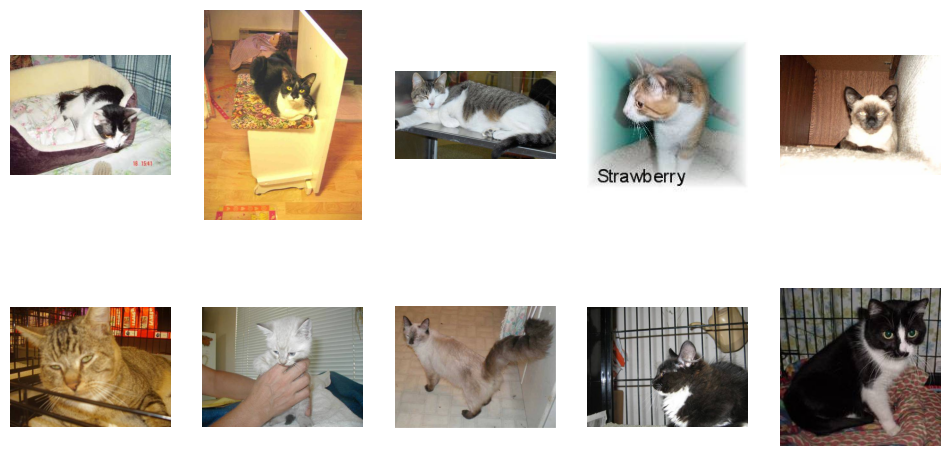

In [4]:
def load_cat_images(folder):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if filename.startswith("cat"): 
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            images.append(img)
            count += 1
            if count == 10:
                break
    return images

cat_images = load_cat_images(folder)
plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(cat_images[i], cv2.COLOR_BGR2RGB))
    plt.axis("off")

plt.show()

In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

model = Sequential([
    Flatten(input_shape=(200, 200, 3)), 
    Dense(128, activation='relu'),       
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')      
])

2023-08-07 19:50:04.680840: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2023-08-07 19:50:04.845109: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2023-08-07 19:50:04.916095: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train, epochs = 1)

2023-08-07 19:50:05.440060: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.
2023-08-07 19:50:06.112278: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


782/782 [==============================] - 222s 281ms/step - loss: 0.0904 - accuracy: 0.9988


In [8]:
_, accuracy = model.evaluate(train)

print(f"Accuracy: {accuracy}")

782/782 [==============================] - 94s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy: 1.0


In [9]:
test_loss, test_acc = model.evaluate(test, verbose=2)

print('\nTest accuracy:', test_acc)

391/391 - 42s - loss: 0.0000e+00 - accuracy: 1.0000 - 42s/epoch - 107ms/step

Test accuracy: 1.0


In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=train, validation_data= test, validation_steps=10,epochs=2,callbacks=[checkpoint,early])


/tmp/ipykernel_28373/2696083131.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=100,generator=train, validation_data= test, validation_steps=10,epochs=2,callbacks=[checkpoint,early])


Epoch 1/2
100/100 [==============================] - 33s 324ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
100/100 [==============================] - 32s 323ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


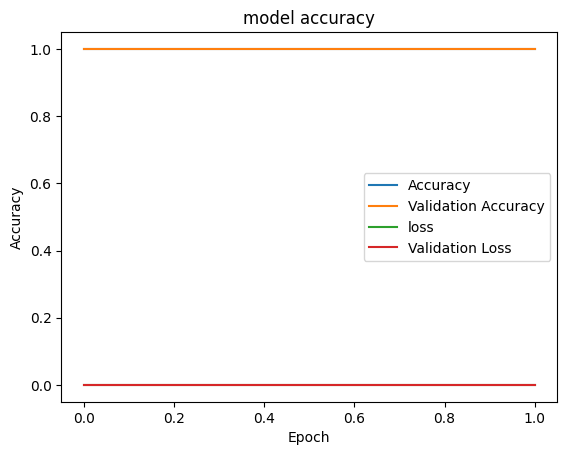

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()